In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df['Total Marks'] = df['reading score']+df['writing score']+df['math score']

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [9]:
def assign_grade(total, mn, sn):
    if total >= mn + 1.5*sn:
        return 'A'
    elif total >= mn + sn:
        return 'B'
    elif total >= mn:
        return 'C'
    elif total>=mn - 0.725*sn:
        return 'D'
    elif total>=mn - (1.5*sn):
        return 'E'
    else:
        return 'F'

In [10]:
msdf = df.groupby('race/ethnicity')['Total Marks'].describe()[['mean', 'std']]

In [11]:
msdf.head()

,mean,std
race/ethnicity,,
group A,188.977528,43.333794
group B,196.405263,44.196399
group C,201.394984,41.616633
group D,207.538168,39.758327
group E,218.257143,43.695047


In [12]:
adf=df[df['race/ethnicity']=='group A']
bdf=df[df['race/ethnicity']=='group B']
cdf=df[df['race/ethnicity']=='group C']
ddf=df[df['race/ethnicity']=='group D']
edf=df[df['race/ethnicity']=='group E']

In [13]:
adf['Grade'] = adf['Total Marks'].apply(lambda total: assign_grade(total, msdf['mean']['group A'], msdf['std']['group A']))
bdf['Grade'] = bdf['Total Marks'].apply(lambda total: assign_grade(total, msdf['mean']['group B'], msdf['std']['group B']))
cdf['Grade'] = cdf['Total Marks'].apply(lambda total: assign_grade(total, msdf['mean']['group C'], msdf['std']['group C']))
ddf['Grade'] = ddf['Total Marks'].apply(lambda total: assign_grade(total, msdf['mean']['group D'], msdf['std']['group D']))
edf['Grade'] = edf['Total Marks'].apply(lambda total: assign_grade(total, msdf['mean']['group E'], msdf['std']['group E']))

In [14]:
df = pd.concat([adf, bdf, cdf, ddf, edf], ignore_index=True)
df.drop('Total Marks',axis=1,inplace = True)

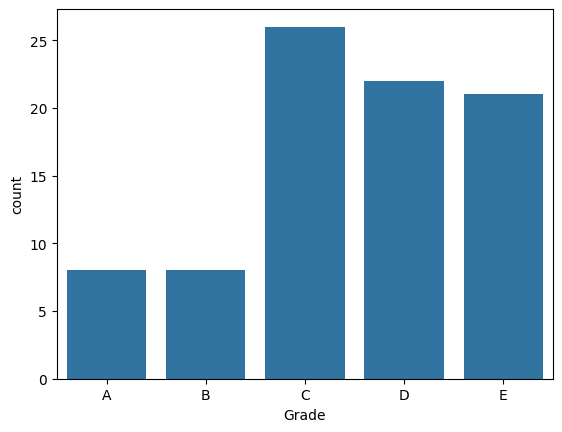

In [15]:
ga = df[df['race/ethnicity'] == 'group A']['Grade']
sns.countplot(x=ga, order=['A', 'B', 'C', 'D', 'E'])
plt.show()

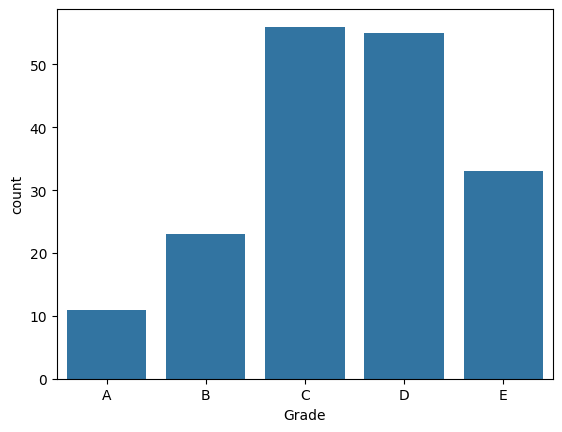

In [16]:
gb = df[df['race/ethnicity'] == 'group B']['Grade']
sns.countplot(x=gb, order=['A', 'B', 'C', 'D', 'E'])
plt.show()

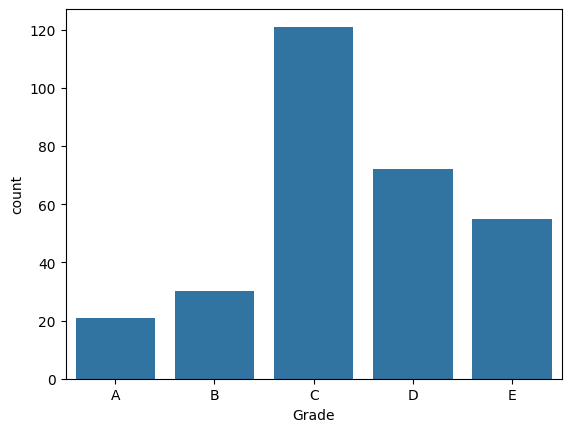

In [17]:
gc = df[df['race/ethnicity'] == 'group C']['Grade']
sns.countplot(x=gc, order=['A', 'B', 'C', 'D', 'E'])
plt.show()

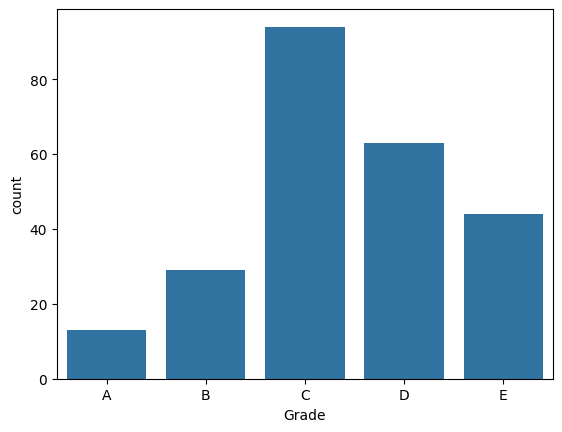

In [18]:
gd = df[df['race/ethnicity'] == 'group D']['Grade']
sns.countplot(x=gd, order=['A', 'B', 'C', 'D', 'E'])
plt.show()

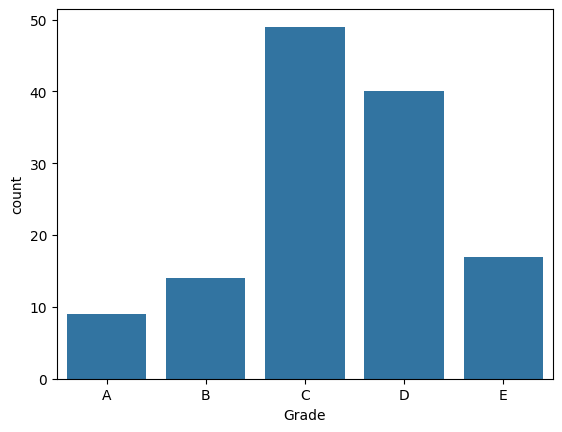

In [19]:
ge = df[df['race/ethnicity'] == 'group E']['Grade']
sns.countplot(x=ge, order=['A', 'B', 'C', 'D', 'E'])
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [21]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [22]:
scaler = StandardScaler()
df[['math score','reading score','writing score']] = scaler.fit_transform(df[['math score','reading score','writing score']])

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade
0,1,group A,associate's degree,free/reduced,none,-1.259543,-0.833899,-1.583744,E
1,1,group A,some college,standard,completed,0.785919,0.193999,0.128127,C
2,0,group A,master's degree,standard,none,-1.061595,-1.108005,-0.661967,D
3,1,group A,master's degree,free/reduced,none,0.456006,0.331052,0.259809,C
4,0,group A,associate's degree,standard,completed,-0.731682,-0.285687,-0.398603,D


In [24]:
X = df[['math score','reading score','writing score']]
Y = df['Grade']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  

model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print("Logistic Regression Accuracy :", accuracy_score(y_test, y_pred1))

Logistic Regression Accuracy : 0.7866666666666666


In [26]:
from sklearn.tree import DecisionTreeClassifier  

model2 = DecisionTreeClassifier ()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print("Decision Tree Accuracy :", accuracy_score(y_test, y_pred2))


Decision Tree Accuracy : 0.7166666666666667


In [27]:
from sklearn.ensemble import RandomForestClassifier  

model3 = RandomForestClassifier()
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print("Random Forest Accuracy (test):", accuracy_score(y_test, y_pred3))


Random Forest Accuracy (test): 0.7933333333333333


In [28]:
from sklearn.metrics import classification_report
print("Classification report of Logistic Regression:")
print(classification_report(y_test,y_pred1))

Classification report of Logistic Regression:
              precision    recall  f1-score   support

           A       0.88      0.75      0.81        20
           B       0.56      0.50      0.53        20
           C       0.82      0.83      0.83       107
           D       0.75      0.79      0.77        80
           E       0.76      0.88      0.82        51
           F       1.00      0.64      0.78        22

    accuracy                           0.79       300
   macro avg       0.80      0.73      0.75       300
weighted avg       0.79      0.79      0.79       300



In [29]:
from sklearn.metrics import classification_report
print("Classification report of Decision Tree:")
print(classification_report(y_test,y_pred2))

Classification report of Decision Tree:
              precision    recall  f1-score   support

           A       0.79      0.75      0.77        20
           B       0.50      0.55      0.52        20
           C       0.81      0.76      0.78       107
           D       0.68      0.66      0.67        80
           E       0.66      0.82      0.73        51
           F       0.76      0.59      0.67        22

    accuracy                           0.72       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.72      0.72      0.72       300



In [30]:
from sklearn.metrics import classification_report
print("Classification report of Random Foresr:")
print(classification_report(y_test,y_pred3))

Classification report of Random Foresr:
              precision    recall  f1-score   support

           A       0.88      0.75      0.81        20
           B       0.56      0.70      0.62        20
           C       0.87      0.79      0.82       107
           D       0.73      0.79      0.76        80
           E       0.80      0.84      0.82        51
           F       0.90      0.86      0.88        22

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.80       300



In [31]:
from sklearn.model_selection import cross_val_score
model1_scores = cross_val_score(LogisticRegression(), X, Y, cv=5, scoring='accuracy')
print("Logistic Regression Accuracy (Cross-Validation):", np.mean(model1_scores))

Logistic Regression Accuracy (Cross-Validation): 0.785


In [32]:
model2_scores = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5, scoring='accuracy')
print("Decision Tree Accuracy (Cross-Validation):", np.mean(model2_scores))

Decision Tree Accuracy (Cross-Validation): 0.689


In [33]:
model3_scores = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5, scoring='accuracy')
print("Random Forest Accuracy (Cross-Validation):", np.mean(model3_scores))

Random Forest Accuracy (Cross-Validation): 0.6910000000000001


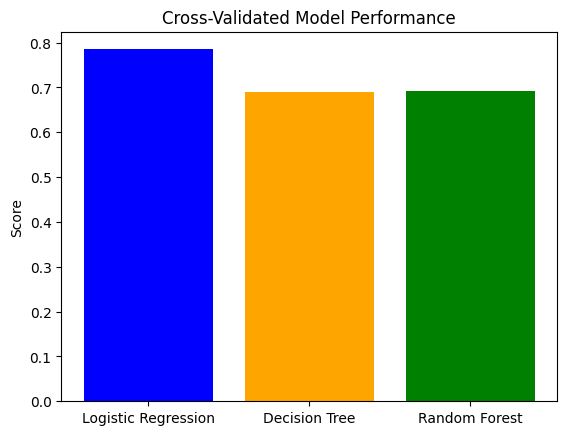

In [34]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
scores = [
    np.mean(model1_scores),      
    np.mean(model2_scores),        
    np.mean(model3_scores),        
]

plt.bar(models, scores, color=['blue', 'orange', 'green'])
plt.title("Cross-Validated Model Performance")
plt.ylabel("Score")
plt.show()
